In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
 
dataset = pd.read_csv(r"/Users/anusreereddysama/Desktop/TECHWORKS/week-9/week-9(2nd-day)/bike_task/Bike_Rental_data(in).csv")
 
# Independent variable (Position Level)
X = dataset.iloc[:, :-1].values
 
# Dependent variable (Salary)
y = dataset.iloc[:, -1].values

# Display dataset preview
print("Dataset Preview:")
print(dataset.head())

Dataset Preview:
    instant    dteday    season    yr mnth        hr holiday   weekday  \
0  0.992410  1/1/2011  springer  2011    1 -0.009452      No  5.990616   
1  2.004157  1/1/2011  springer  2011    1  1.007925      No  5.996162   
2  2.984610  1/1/2011  springer  2011    1  1.993083      No  6.004768   
3  3.993251  1/1/2011  springer  2011    1  2.991451      No  5.980473   
4  4.990763  1/1/2011  springer  2011    1  4.024688      No  5.984412   

  workingday weathersit  temp   atemp   hum windspeed casual registered  \
0    No work      Clear  0.24  0.2879  0.81         0      3         13   
1    No work      Clear  0.22  0.2727   0.8         0      8         32   
2    No work      Clear  0.22  0.2727     ?         0      5         27   
3    No work      Clear  0.24  0.2879  0.75         0      3         10   
4    No work      Clear  0.24  0.2879  0.75         0      0          1   

         cnt  
0  15.999019  
1  40.004970  
2  32.004786  
3  12.999856  
4   1.002089

/var/folders/22/x7v1_1017xg03qk5zzm7x5j40000gn/T/ipykernel_4808/1225156730.py:6: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv(r"/Users/anusreereddysama/Desktop/TECHWORKS/week-9/week-9(2nd-day)/bike_task/Bike_Rental_data(in).csv")


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,     
    random_state=42     
)


<Axes: >

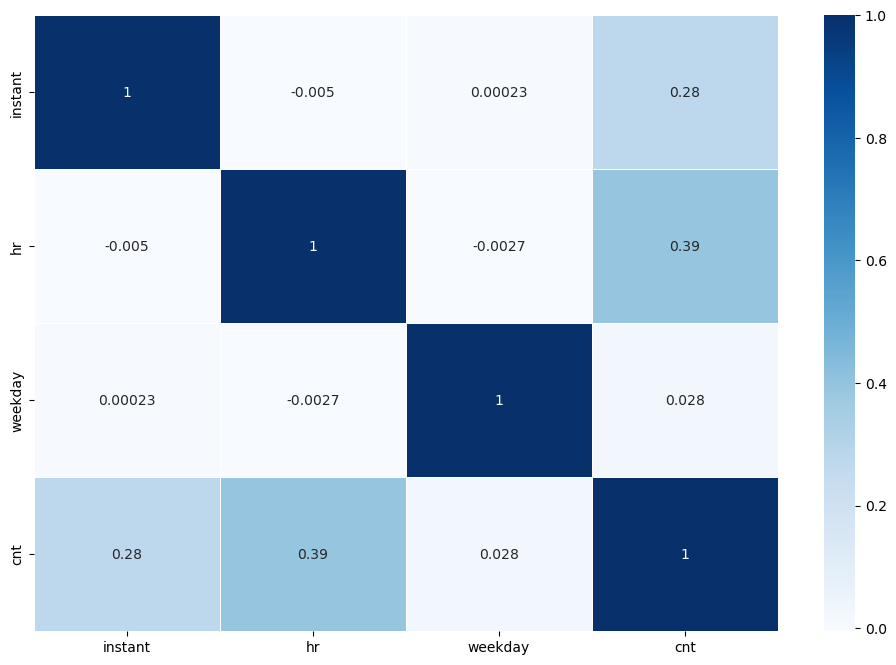

In [3]:
import seaborn as sns

numeric_cols=dataset.select_dtypes(include='number')
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True,cmap='Blues',linewidths=0.5)

In [4]:
target = "cnt"

target_corr = corr_matrix[target].sort_values(ascending=False)

print("Top positive correlations with target:")
print(target_corr[target_corr > 0].drop(target))

print("\nTop negative correlations with target:")
print(target_corr[target_corr < 0])

Top positive correlations with target:
hr         0.392705
instant    0.277541
weekday    0.027915
Name: cnt, dtype: float64

Top negative correlations with target:
Series([], Name: cnt, dtype: float64)


<Axes: >

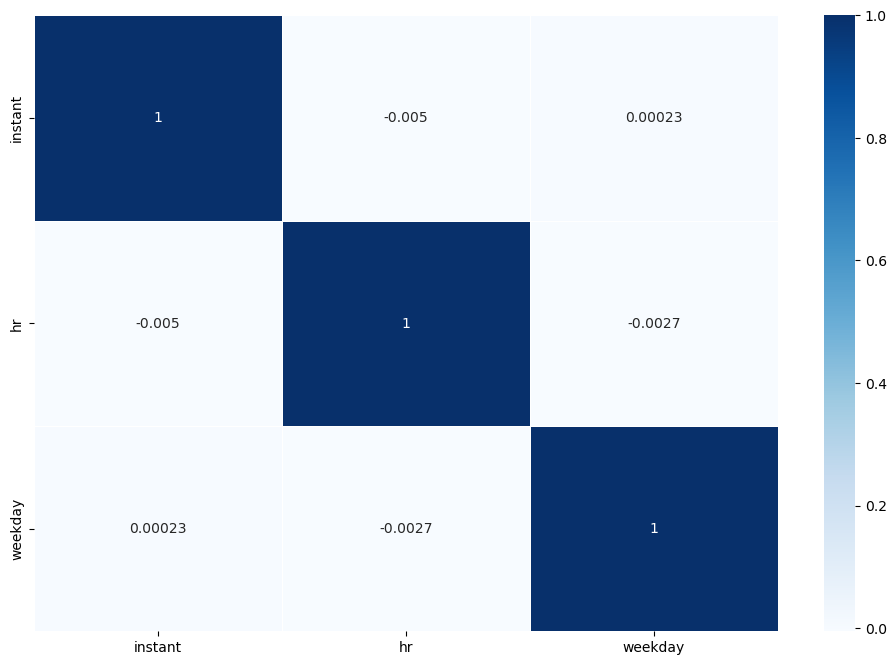

In [5]:
numeric_cols=dataset.select_dtypes(include='number')
new=numeric_cols.drop(columns='cnt')
corr_matrix = new.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True,cmap='Blues',linewidths=0.5)

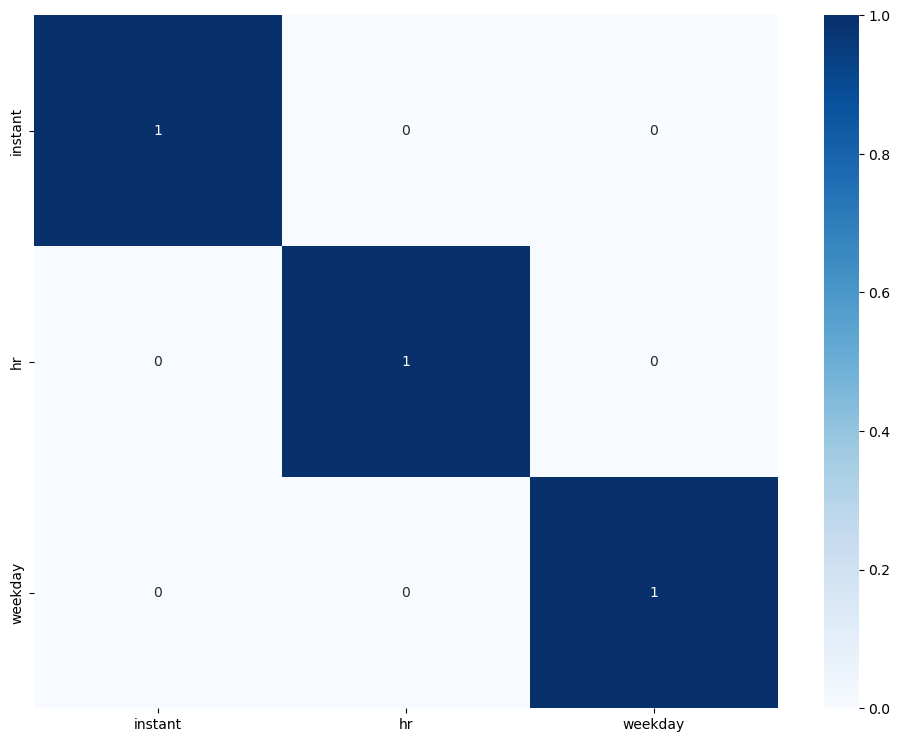

In [6]:

import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))
sns.heatmap(new.corr(numeric_only=True)>0.75, annot=True,cmap='Blues')
plt.show()

In [ ]:
from sklearn.linear_model import Ridge

model_r = Ridge(alpha=10)
model_r.fit()

# predict for a sample engine size (e.g., 200)
ridge_prediction = model_r.predict([[200]])
print("Ridge Regression Prediction for engine size 200:", ridge_prediction)